In [39]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Concatenate

In [5]:
# Input layer
x = Input(shape = (3, ))

In [16]:
# Hidden layer1
hidden1 = Dense(128, activation = 'relu')(x)
hidden2 = Dense(64, activation = 'relu')(hidden1)

# Output layer
output1 = Dense(1, activation = 'linear')(hidden2)
output2 = Dense(1, activation = 'sigmoid')(hidden2)

In [17]:
model = Model(inputs = x, outputs = [output1, output2])

In [18]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 3)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 128)            │            512 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 64)             │          8,256 │ dense_8[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 1)              │             65 │ dense_9[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_11 (Dense)          │ (None, 1)              │             65 │ dense_9[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 8,898 (34.76 KB)

 Trainable params: 8,898 (34.76 KB)

 Non-trainable params: 0 (0.00 B)

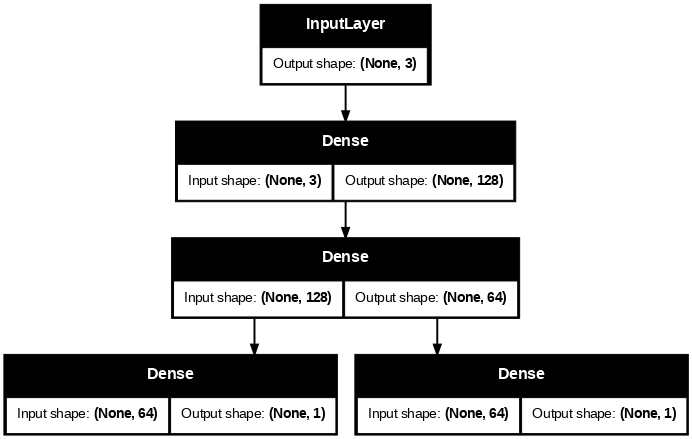

In [46]:
from keras.utils import plot_model
plot_model(model, show_shapes = True, dpi = 70)

## Model 2

In [55]:
# Create the first feature extraction layer
model1_input = Input(shape = (128, ))
x = Dense(64, activation = 'relu')(model1_input)
x = Dense(32, activation = 'relu')(x)
model1_output = Dense(4, activation = 'relu')(x)


# Create the second feature extraction layer
model2_input = Input(shape = (32, ))
y = Dense(8, activation = 'relu')(model2_input)
model2_output = Dense(4, activation = 'relu')(y)

In [56]:
# Concatenate the models
combined = Concatenate()([model1_output, model2_output])
# Use the combined model to create the output layer
z = Dense(2, activation = 'relu')(combined)
output_model = Dense(1, activation = 'sigmoid')(z)

model = Model(inputs = [model1_input, model2_input], outputs = output_model)

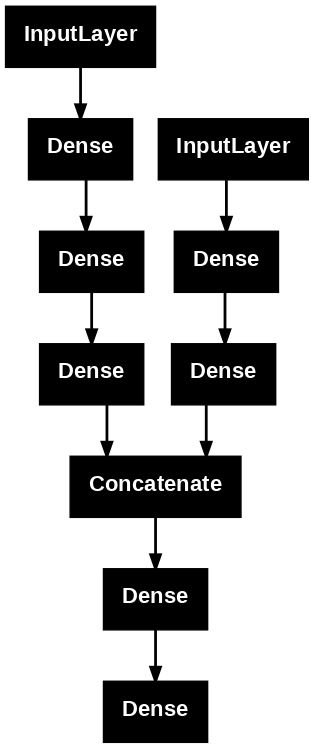

In [64]:
plot_model(model, dpi= 100)